# Problem set 1: Printing and plotting

**Table of contents**<a id='toc0_'></a>    
- 1. [define function](#toc1_)    
- 2. [print to screen (table)](#toc2_)    
- 3. [write the output to `table_output.txt`](#toc3_)    
- 4. [read `table_output.txt` and print content to screen](#toc4_)    
- 5. [2d plot indifference curves](#toc5_)    
- 6. [3d plots](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Imports you will need:

In [42]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D # for 3D plots
from matplotlib import cm # for colormap

# predefine options for all plots
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'-'})
plt.rcParams.update({'font.size': 14})

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

**Note:** Answers are in A*.py files.

## 1. <a id='toc1_'></a>[define function](#toc0_)

Implement a Python version of this function:

$$ 
u(x_1,x_2) = (\alpha x_1^{-\beta} + (1-\alpha) x_2^{-\beta})^{-1/\beta} 
$$

where `x1` and `x2` are *positional arguments*, and `alpha`and `beta` are *keyword arguments* with default arguments $\alpha=0.5$ and $\beta=1$.

In [43]:
def u_func(x1,x2,alpha=0.50,beta=1):
    return (alpha*x1**(-beta) +(1-alpha)*x2**(-beta))**(-1/beta)



## 2. <a id='toc2_'></a>[print to screen (table)](#toc0_)

In [44]:
x1_vec = [1.05,1.3,2.3,2.5,3.1]
x2_vec = [1.05,1.3,2.3,2.5,3.1]

Construct a Python function `gen_table(x1_vec,x2_vec,u_func)` to print values of `u(x1,x2)` in the table form shown below.

In [45]:
# update this code

def gen_table(x1_vec,x2_vec,u_func):
    
    # a. empty text
    text = ''
    
    # b. top header
    text += f'{"":3s}' # top header
    for j, x2 in enumerate(x2_vec):
       text += f'{j:6d}' 
    text += '\n' # line shift
    
    # c. body
    for i, x1 in enumerate(x1_vec):
        text += f'{i:3d}'  # row header
        for x2 in x2_vec:
            u_val = u_func(x1, x2)
            text += f'{u_val:6.3f}'
        text += '\n'  # line shift 
    
    # d. print
    return text

table = gen_table(x1_vec,x2_vec,u_func)
print(table)

        0     1     2     3     4
  0 1.050 1.162 1.442 1.479 1.569
  1 1.162 1.300 1.661 1.711 1.832
  2 1.442 1.661 2.300 2.396 2.641
  3 1.479 1.711 2.396 2.500 2.768
  4 1.569 1.832 2.641 2.768 3.100



In [46]:
from A1 import u_func as u_func_answer
from A2 import gen_table as gen_table_answer
print(gen_table_answer(x1_vec,x2_vec,u_func_answer))

ModuleNotFoundError: No module named 'A1'

## 3. <a id='toc3_'></a>[write the output to `table_output.txt`](#toc0_)

In [47]:
# write your code here
with open('table_output.txt', 'w') as f: # 'w' is for 'write'
    f.write(table)

## 4. <a id='toc4_'></a>[read `table_output.txt` and print content to screen](#toc0_)

In [48]:
with open('table_output.txt', 'r') as f: # 'r' is for 'read'
    
    # loading ALL file content into the object lines
    lines = f.readlines()
    
    # printing each loaded line by loop
    for line in lines:
        print(line,end='') # end='' removes the extra lineshift print creates

        0     1     2     3     4
  0 1.050 1.162 1.442 1.479 1.569
  1 1.162 1.300 1.661 1.711 1.832
  2 1.442 1.661 2.300 2.396 2.641
  3 1.479 1.711 2.396 2.500 2.768
  4 1.569 1.832 2.641 2.768 3.100


## 5. <a id='toc5_'></a>[2d plot indifference curves](#toc0_)

The formula for the indifference curves of $u(x_1,x_2)$ is:

$$
x_2(x_1, u) = \left( \frac{u^{-\beta} - \alpha x_1^{-\beta}}{1-\alpha} \right)^{-1/\beta}
$$

for 

$$
\log(x_1) > \log(u) + \log(\alpha)/\beta
$$

In [49]:
# these values were used
alpha = 0.5 
betas = [0.25, 1.0, 4.0]
uvals = [1.5, 2.0, 2.5] # values of u

# write your code here

def cx2_fun(x1,u,alpha=0.5,beta=1.0):
    
    if np.log(x1) > np.log(u) + np.log(alpha)/beta: # betingelse 
        return ((u**(-beta) - alpha*x1**(-beta))/(1-alpha))**(-1/beta) #funktion 
    else:
        return np.nan  # Return NaN hvis betingelsen ikke er opfyldt

Produce a figure like the one below and save to disc.

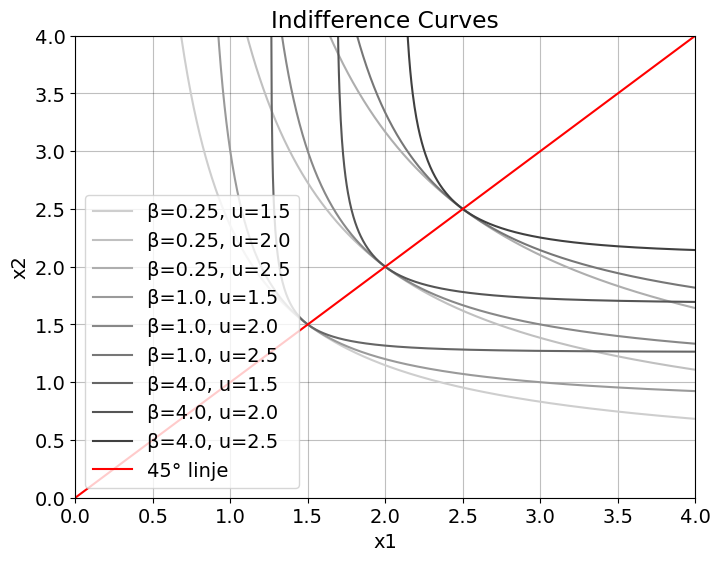

In [50]:
# Opretter plot-funktion
def plot(alpha, betas, uvals):
    # Simpel version af plottet
    x1_plot = np.linspace(0.1, 4, 1000) # oprette 1000 x1-værdier mellem 0.1 og 4

    plt.figure(figsize=(8, 6)) # Opretter en figur og angiver størrelsen

    # Definer grå farver
    colors_greys = plt.cm.Greys(np.linspace(0.3, 0.8, len(betas) * len(uvals)))
    
    # Plot for hver kombination af beta og u
    color_index = 0  # Tæller for farver
    for beta in betas: #gemmer beta værdierne fra tidligere 
        for u in uvals: #gemmer beta værdierne fra tidligere
            x2_values = [] #opretter tomme lister 
            x1_valid = [] #opretter tomme lister 
            
            for x1 in x1_plot:
                x2 = cx2_fun(x1, u, alpha, beta) # Beregner x2 for denne x1-værdi ved funktion fra tidligere kode 
                if not np.isnan(x2): 
                    x2_values.append(x2)
                    x1_valid.append(x1)
            
            if x1_valid:  # Kun plot hvis der er gyldige punkter
                plt.plot(x1_valid, x2_values, 
                        color=colors_greys[color_index], 
                        label=f'β={beta}, u={u}')
                color_index += 1  # Næste farve til næste kurve

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Indifference Curves')

    plt.plot([0, 4], [0, 4], color='red', linestyle='-', label='45° linje') # min 45 grader linje 
    
    plt.legend()
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.grid(True)
    plt.savefig('A5_indifference_curves.png')
    plt.show()

# Kalder funktionen
plot(alpha, betas, uvals)

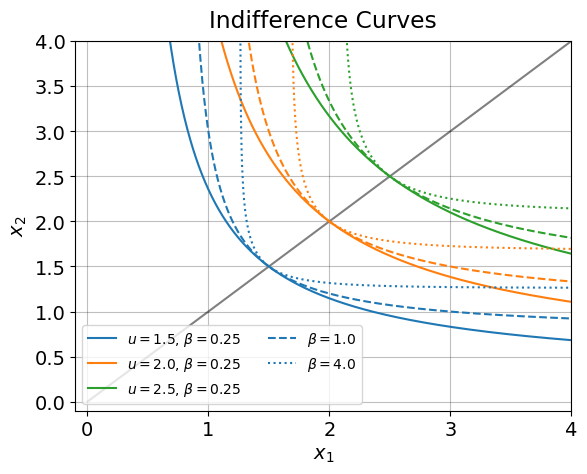

In [51]:
#opretter en sti til import-linjen som ligger i jeppe mappe og sammenligner svar 
import sys
sys.path.append(r'c:\Users\fanny\OneDrive - University of Copenhagen\5. semester\Programmering\ProgEcon-exercises\Problem_set_1_Printing_and_plotting')
import A5
A5.plot(alpha,betas,uvals)

**Hint:** To check your implementation of `x2(x1,u,alpha,beta)` you can use the code below.

In [ ]:
# x1_ = 2.0
# x2_ = 1.5
# u_ = u_func(x1_,x2_,alpha=alpha,beta=betas[0])
# x2_implied = x2_func(x1_,u_,alpha=alpha,beta=betas[0])
# assert np.isclose(x2_,x2_implied)

## 6. <a id='toc6_'></a>[3d plot of utility function](#toc0_)

Reproduce the figures below of $u(x_1,x_2)$ using:

1. the `meshgrid` function from *numpy* 
1. the `.plot_countour`, `.plot_surface` and `.plot` axis methods from *matplotlib*.

where the black lines are indifference curves for $u \in \{1,2,3\}$.

**Hint:** You can look at the documentation.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import A1, A5

def plot_3d(x1_vec, x2_vec, alpha, beta, uvals, save_path=None):
    # a) beregn grids og utility
    x1_grid, x2_grid = np.meshgrid(x1_vec, x2_vec, indexing='ij')  # shape (n1, n2)
    u_grid = A1.u_func(x1_grid, x2_grid, alpha=alpha, beta=beta)   # skal matche shape

    if u_grid.shape != x1_grid.shape:
        raise ValueError(f"u_func skal returnere shape {x1_grid.shape}, men fik {u_grid.shape}")

    # b) plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(1,1,1, projection='3d')

    surf = ax.plot_surface(x1_grid, x2_grid, u_grid, cmap=cm.jet, alpha=0.75, linewidth=0, antialiased=True)
    fig.colorbar(surf, ax=ax, shrink=0.75, pad=0.05)

    # c) indifferenskurver (niveaukurver) som rumlige kurver ved z = uval
    x2_min, x2_max = np.min(x2_vec), np.max(x2_vec)

    for uval in uvals:
        # Domæne for log: x1_vec > 0. Inequality fra din underviser bevares:
        I = np.log(x1_vec) > (np.log(uval) + np.log(alpha) / beta)
        x1_cut = x1_vec[I]

        if x1_cut.size == 0:
            continue

        # Beregn x2 som funktion af x1 for givet nytteniveau uval
        x2_curve = A5.x2_func(x1_cut, uval, alpha=alpha, beta=beta)

        # Robust filtrering: kun reelle, endelige og inden for plottets x2-akse
        mask = np.isfinite(x2_curve) & (x2_curve >= x2_min) & (x2_curve <= x2_max)
        if np.any(mask):
            x1_ok = x1_cut[mask]
            x2_ok = x2_curve[mask]
            z_ok  = np.full_like(x2_ok, fill_value=uval, dtype=float)
            ax.plot(x1_ok, x2_ok, z_ok, lw=2.5, color='black', zorder=99)

    # d) akser, titel, kamera
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
    ax.set_zlabel(r'$u(x_1,x_2)$')
    ax.set_title('3D Utility Surface med indifferenskurver')
    ax.invert_xaxis()                 # samme “front-origo”-look som i undervisers kode
    ax.view_init(elev=25, azim=-60)   # pæn standardvinkel
    fig.tight_layout(pad=0.1)

    # e) gem før show (hvis ønsket)
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()


In [ ]:
import A6
A6.plot(x1_vec,x2_vec,alpha,beta,uvals)

NameError: name 'beta' is not defined